In [96]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-top-1000-movies/imdb_clean.csv
/kaggle/input/imdb-top-1000-movies/imdb_clean2.csv


## Data Preparation

In [97]:
df = pd.read_csv("/kaggle/input/imdb-top-1000-movies/imdb_clean.csv")
df.head(5)

,title,release_year,runtime,genre,rating,gross(M)
0,The Shawshank Redemption,1994,142 min,Drama,9.3,28.34
1,The Godfather,1972,175 min,Crime,9.2,134.97
2,The Godfather,1972,175 min,Drama,9.2,134.97
3,The Dark Knight,2008,152 min,Action,9.0,534.86
4,The Dark Knight,2008,152 min,Crime,9.0,534.86


In [98]:
## Cleaning the runtime column values.

df["runtime"] = df["runtime"].apply(lambda x : x.replace("min",""))
df["runtime"] = df["runtime"].astype(int)
df.head(5)

,title,release_year,runtime,genre,rating,gross(M)
0,The Shawshank Redemption,1994,142,Drama,9.3,28.34
1,The Godfather,1972,175,Crime,9.2,134.97
2,The Godfather,1972,175,Drama,9.2,134.97
3,The Dark Knight,2008,152,Action,9.0,534.86
4,The Dark Knight,2008,152,Crime,9.0,534.86


In [99]:
## Removing the film with zero gross profits.
## These films do not have accurate gross profit recorded.

df = df.loc[df["gross(M)"] != 0]
df.head(5)

,title,release_year,runtime,genre,rating,gross(M)
0,The Shawshank Redemption,1994,142,Drama,9.3,28.34
1,The Godfather,1972,175,Crime,9.2,134.97
2,The Godfather,1972,175,Drama,9.2,134.97
3,The Dark Knight,2008,152,Action,9.0,534.86
4,The Dark Knight,2008,152,Crime,9.0,534.86


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2526
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2053 non-null   object 
 1   release_year  2053 non-null   int64  
 2   runtime       2053 non-null   int64  
 3   genre         2053 non-null   object 
 4   rating        2053 non-null   float64
 5   gross(M)      2053 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 112.3+ KB


In [101]:
## Adding a column for decade.

df["decade"] = df["release_year"].astype(str).apply(lambda x : "".join([x[0:3],"0"]))

## Reordering table for ease of use.

df = df[["title","release_year","decade","runtime","genre","rating","gross(M)"]]
df.head(5)

,title,release_year,decade,runtime,genre,rating,gross(M)
0,The Shawshank Redemption,1994,1990,142,Drama,9.3,28.34
1,The Godfather,1972,1970,175,Crime,9.2,134.97
2,The Godfather,1972,1970,175,Drama,9.2,134.97
3,The Dark Knight,2008,2000,152,Action,9.0,534.86
4,The Dark Knight,2008,2000,152,Crime,9.0,534.86


In [102]:
## Renaming the runtime column

df = df.rename(columns={
    "runtime":"runtime_min"
})

## Renaming the gross(M) column

df = df.rename(columns={
    "gross(M)":"gross_usd_mil"
})

df.head(5)

,title,release_year,decade,runtime_min,genre,rating,gross_usd_mil
0,The Shawshank Redemption,1994,1990,142,Drama,9.3,28.34
1,The Godfather,1972,1970,175,Crime,9.2,134.97
2,The Godfather,1972,1970,175,Drama,9.2,134.97
3,The Dark Knight,2008,2000,152,Action,9.0,534.86
4,The Dark Knight,2008,2000,152,Crime,9.0,534.86


In [103]:
## combining genres in single rows.


## storing all titles in the title column:
myset = set()
for x in df["title"]:
    myset.add(x)
    
## creating a new dictionary for title + genre list
newdict = {}
for x in myset:
    just_genres = df.loc[df["title"] == x]["genre"]
    genre_list = []
    for g in just_genres:
        genre_list.append(g)
    newdict[x] = genre_list
    
## Creating a new df
newdf = pd.DataFrame()

## modifying the df
for x in newdict.keys():
    genre_string = ", ".join(newdict[x])
    df.loc[df["title"]==x,"genre"] = genre_string
    
df = df.drop_duplicates()
df.head(5)

,title,release_year,decade,runtime_min,genre,rating,gross_usd_mil
0,The Shawshank Redemption,1994,1990,142,Drama,9.3,28.34
1,The Godfather,1972,1970,175,"Crime, Drama",9.2,134.97
3,The Dark Knight,2008,2000,152,"Action, Crime, Drama",9.0,534.86
6,Schindler's List,1993,1990,195,"Biography, Drama, History",9.0,96.90
9,12 Angry Men,1957,1950,96,"Crime, Drama",9.0,4.36


In [104]:
## Sorting the data frame from newest to oldest.

df = df.sort_values(by="release_year",ascending=False)
df

,title,release_year,decade,runtime_min,genre,rating,gross_usd_mil
1509,Everything Everywhere All at Once,2022,2020,139,"Action, Adventure, Comedy",7.8,72.86
1185,Puss in Boots: The Last Wish,2022,2020,102,"Animation, Adventure, Comedy",7.9,168.46
1506,The Batman,2022,2020,176,"Action, Crime, Drama",7.8,369.35
230,Top Gun: Maverick,2022,2020,130,"Action, Drama",8.3,718.73
326,K.G.F: Chapter 2,2022,2020,168,"Action, Crime, Drama",8.3,6.60
...,...,...,...,...,...,...,...
781,The General,1926,1920,78,"Action, Adventure, Comedy",8.1,1.03
787,The Gold Rush,1925,1920,95,"Adventure, Comedy, Drama",8.1,5.45
1480,Battleship Potemkin,1925,1920,66,"Drama, History, Thriller",7.9,0.05
517,Sherlock Jr.,1924,1920,45,"Action, Comedy, Romance",8.2,0.98


## Data Analysis

### Research Questions
* How much did the films in a particular decade earn?
* For a particular decade, which movie was the highest grossing film?
* Which was the highest grossing film released in the last 10 years?
* Which was the lowest, non-zero, grossing film in the last 10 years?
* Which genre was most common in the last 10 years?
* Which were the highest grossing genre in the past 10 years?
* Which genres have become more common over the years?
* Which genres have become less common over the years?
* Which genres garner high ratings?
* What are the highest-rated films in the past 10 years?
* How many films have been released per year?

### Hypotheses
* Having more genres can increase film's gross profits.
* Longer runtime can reduce a film's gross profits.
* Having a high rating is related to high gross profits.
* The number of films released per year have been steadily increasing.

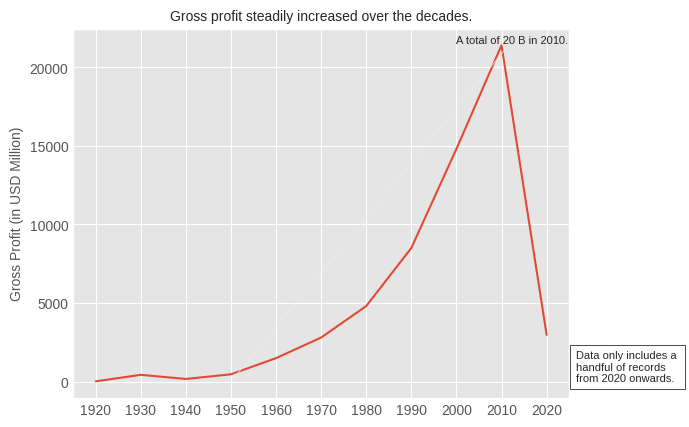

In [105]:
## Analyzing total gross profit per decade.

plt.style.use("ggplot")

data = df.groupby("decade").agg("sum", numeric_only=True)["gross_usd_mil"].to_frame().reset_index()
data_x = data["decade"]
data_y = data["gross_usd_mil"]

## plotting using a line chart.

fig, ax = plt.subplots()

ax.plot(data_x, data_y)
ax.set_ylabel("Gross Profit (in USD Million)",fontsize=10)
ax.set_title("Gross profit steadily increased over the decades.",fontsize=10)

ax.annotate('A total of 20 B in 2010.', xy=(3, 9), xytext=(8, 21_500),fontsize=8,
             arrowprops=dict(arrowstyle='->'))

ax.text(10.65,0,"Data only includes a \nhandful of records \nfrom 2020 onwards.",
        fontsize=8,bbox={"facecolor":"white","edgecolor":"black"})

plt.show()

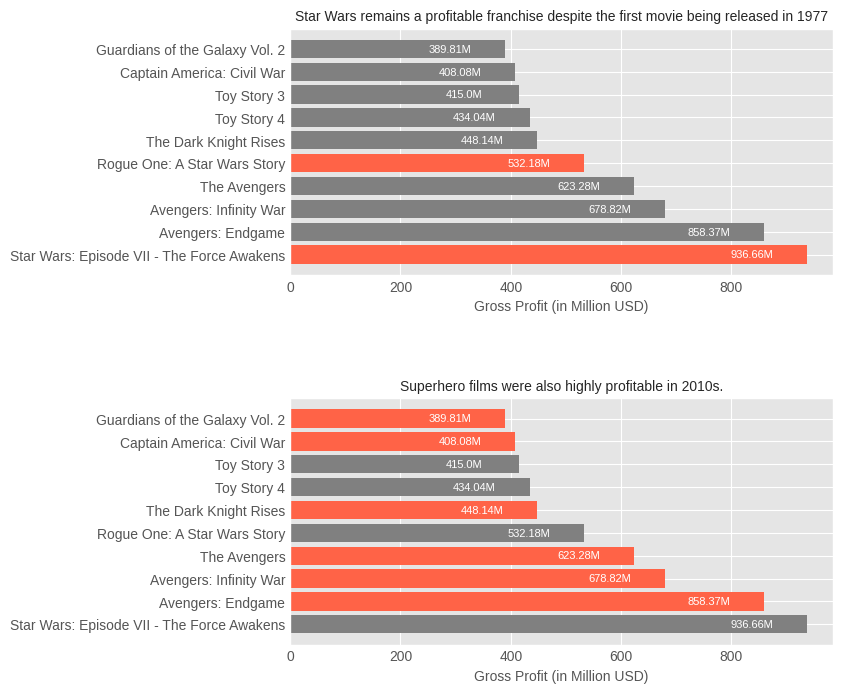

In [144]:
## Highest grossing film in 2010s.

data = df.loc[df["decade"] == "2010"].sort_values(by="gross_usd_mil",ascending=False).head(10)
data = data[["title","genre","gross_usd_mil"]]
data_x = data["title"]
data_y = data["gross_usd_mil"]

fig,(ax,ax1) = plt.subplots(2,1,figsize=(7,8))

starwars_list = ["Star Wars: Episode VII - The Force Awakens","Rogue One: A Star Wars Story"]

ax.barh(data_x, data_y,color=["tomato" if title in starwars_list else "gray" for title in data_x])

for i,v in enumerate(data_y):
    ax.text(v-100,i,str(v)+"M",fontsize=8,ha="center",color="white",va="center")
ax.set_xlabel("Gross Profit (in Million USD)",fontsize=10)

ax.set_title("Star Wars remains a profitable franchise despite the first movie being released in 1977",fontsize=10)


## Coloring the superhero movies.

data = df.loc[df["decade"] == "2010"].sort_values(by="gross_usd_mil",ascending=False).head(10)
data = data[["title","genre","gross_usd_mil"]]
data_x = data["title"]
data_y = data["gross_usd_mil"]

super_list = ["Avengers: Endgame","Avengers: Infinity War","The Avengers","The Dark Knight Rises","Captain America: Civil War","Guardians of the Galaxy Vol. 2"]

maxval = data_y.max()

ax1.barh(data_x, data_y,color=["tomato" if title in super_list else "gray" for title in data_x])

for i,v in enumerate(data_y):
    ax1.text(v-100,i,str(v)+"M",fontsize=8,ha="center",color="white",va="center")
ax1.set_xlabel("Gross Profit (in Million USD)",fontsize=10)

ax1.set_title("Superhero films were also highly profitable in 2010s.",fontsize=10)

fig.subplots_adjust(hspace=0.5)

plt.show()


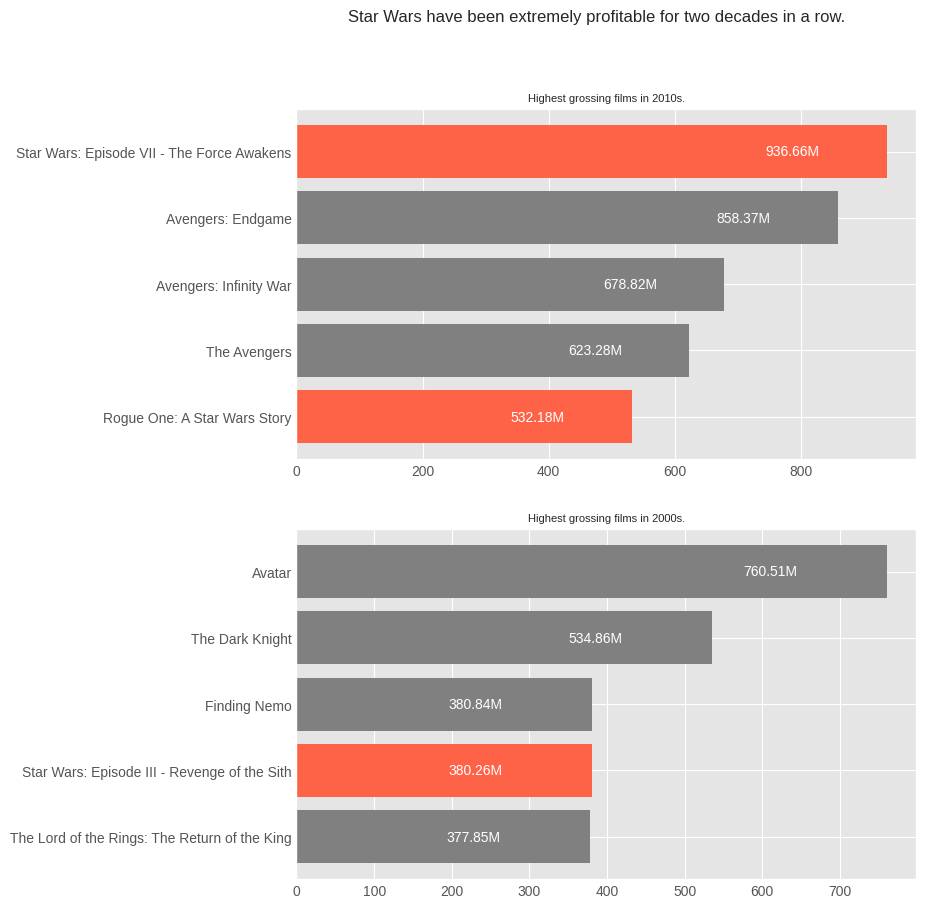

In [178]:
## Comparing the top highest grossing films of 2010s and 2000s. 

##2010s

data = df.loc[df["decade"] == "2010"]
data = data.sort_values(by="gross_usd_mil",ascending=False).head(5)
data = data.sort_values(by="gross_usd_mil",ascending=True)
data_x = data["title"]
data_y = data["gross_usd_mil"]

fig,(ax,ax1) = plt.subplots(2,1,figsize=(8,10))

for i,v in enumerate(data_y):
    ax.text(v-150,i,str(v)+"M",fontsize=10,ha="center",color="white",va="center")

ax.barh(data_x,data_y,color=["tomato" if "Star Wars" in title else "gray" for title in data_x])
ax.set_title("Highest grossing films in 2010s.",fontsize=8)


## 2000s.

data = df.loc[df["decade"] == "2000"]
data = data.sort_values(by="gross_usd_mil",ascending=False).head(5)
data = data.sort_values(by="gross_usd_mil",ascending=True)
data_x = data["title"]
data_y = data["gross_usd_mil"]

for i,v in enumerate(data_y):
    ax1.text(v-150,i,str(v)+"M",fontsize=10,ha="center",color="white",va="center")

ax1.barh(data_x,data_y,color=["tomato" if "Star Wars" in title else "gray" for title in data_x])
ax1.set_title("Highest grossing films in 2000s.",fontsize=8)


fig.subplots_adjust(wspace=1.1)
fig.suptitle("Star Wars have been extremely profitable for two decades in a row.",fontsize=12)
plt.show()